In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/heartrate_seconds_merged.csv")

df.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97.0
1,2022484408,4/12/2016 7:21:05 AM,102.0
2,2022484408,4/12/2016 7:21:10 AM,105.0
3,2022484408,4/12/2016 7:21:20 AM,103.0
4,2022484408,4/12/2016 7:21:25 AM,101.0


In [2]:
df.tail()

,Id,Time,Value
435905,4020332650,5/4/2016 7:33:14 PM,102.0
435906,4020332650,5/4/2016 7:33:17 PM,102.0
435907,4020332650,5/4/2016 7:33:20 PM,102.0
435908,4020332650,5/4/2016 7:33:23 PM,102.0
435909,4020332650,5/4/2016 7:33:2,NaN


In [3]:
df.shape

(435910, 3)

In [4]:
df.describe()

,Id,Value
count,4.359100e+05,435909.000000
mean,2.716611e+09,79.956083
std,8.453554e+08,16.912205
min,2.022484e+09,38.000000
25%,2.022484e+09,67.000000
50%,2.347168e+09,76.000000
75%,4.020333e+09,90.000000
max,4.020333e+09,203.000000


In [5]:
df.columns

Index(['Id', 'Time', 'Value'], dtype='object')

In [6]:
#changing all the proper camel-case names to lowercase
df.rename({'Id': 'ID', 'Time': 'time', 'Value': 'value'}, axis=1, inplace=True)

df.columns

Index(['ID', 'time', 'value'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435910 entries, 0 to 435909
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      435910 non-null  int64  
 1   time    435910 non-null  object 
 2   value   435909 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.0+ MB


In [8]:
#convert "time" column to datetime data type
df['time'] = pd.to_datetime(df['time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435910 entries, 0 to 435909
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ID      435910 non-null  int64         
 1   time    435910 non-null  datetime64[ns]
 2   value   435909 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 10.0 MB


In [10]:
df.nunique()

ID            4
time     375360
value       165
dtype: int64

In [11]:
df.isnull().sum()

ID       0
time     0
value    1
dtype: int64

In [12]:
if df is None:
  print("DataFrame is not defined. Cannot fill missing values.")
else:
  if df.empty:
    print("DataFrame is empty. Cannot fill missing values.")
  else:
    df['value'] = df['value'].fillna(df['value'].mode()[0])

print(df)

                ID                time  value
0       2022484408 2016-04-12 07:21:00   97.0
1       2022484408 2016-04-12 07:21:05  102.0
2       2022484408 2016-04-12 07:21:10  105.0
3       2022484408 2016-04-12 07:21:20  103.0
4       2022484408 2016-04-12 07:21:25  101.0
...            ...                 ...    ...
435905  4020332650 2016-05-04 19:33:14  102.0
435906  4020332650 2016-05-04 19:33:17  102.0
435907  4020332650 2016-05-04 19:33:20  102.0
435908  4020332650 2016-05-04 19:33:23  102.0
435909  4020332650 2016-05-04 07:33:02   70.0

[435910 rows x 3 columns]


**DATA VISUALISATION**

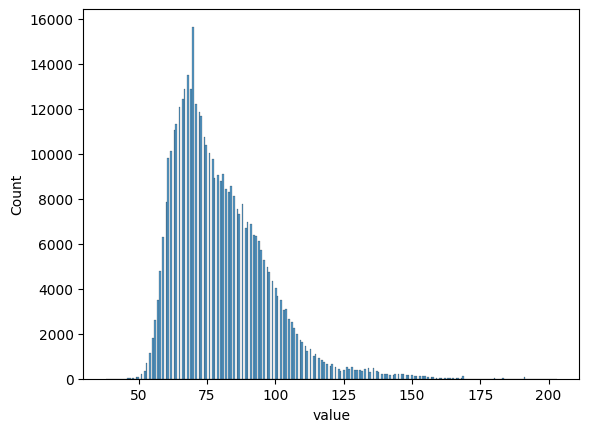

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='value', data=df, )
plt.show()

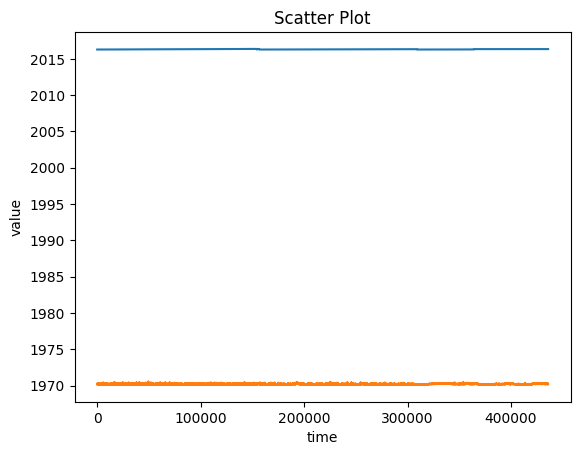

In [17]:
#scatterplot with time value against value
plt.plot(df['time'])
plt.plot(df['value'])

plt.title("Scatter Plot")

plt.xlabel('time')
plt.ylabel('value')

plt.show()